# Open Pose 사용 코드 템플릿

https://github.com/ForgottenOneNyx/Open-Pose-Keras 의 코드를 사용하여 포즈를 추출한다.

프로젝트 내의 demo.ipynb를 기반으로 하였다.

# 프로젝트 다운로드

In [1]:
!git clone https://github.com/dhrim/Open-Pose-Keras

Cloning into 'Open-Pose-Keras'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 418 (delta 11), reused 21 (delta 11), pack-reused 397
Receiving objects: 100% (418/418), 29.70 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [2]:
%cd Open-Pose-Keras

/content/Open-Pose-Keras


# 필요한 라이브러리 설치

In [3]:
!pip install configobj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=f1fd0f9cf24ad9eec5d9af59568e39f5e0c36521fe9da85add69d47429343baa
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


# 대상 이미지 준비

# 데이터 준비

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#!cp /gdrive/MyDrive/DATA/SIT.zip ./

In [7]:
!cp /gdrive/MyDrive/DATA/5/good/2/*.jpg ./

In [9]:
!ls -al *.jpg

-rw------- 1 root root  35537 Aug 23 09:02 0.jpg
-rw------- 1 root root 150520 Aug 23 09:02 100.jpg
-rw------- 1 root root 150875 Aug 23 09:02 101.jpg
-rw------- 1 root root 150513 Aug 23 09:02 102.jpg
-rw------- 1 root root 150538 Aug 23 09:02 103.jpg
-rw------- 1 root root 150233 Aug 23 09:02 104.jpg
-rw------- 1 root root 150444 Aug 23 09:02 105.jpg
-rw------- 1 root root 150259 Aug 23 09:02 106.jpg
-rw------- 1 root root 150570 Aug 23 09:02 107.jpg
-rw------- 1 root root 150345 Aug 23 09:02 108.jpg
-rw------- 1 root root 150002 Aug 23 09:02 109.jpg
-rw------- 1 root root 152434 Aug 23 09:02 10.jpg
-rw------- 1 root root 149314 Aug 23 09:02 110.jpg
-rw------- 1 root root 149025 Aug 23 09:02 111.jpg
-rw------- 1 root root 148907 Aug 23 09:02 112.jpg
-rw------- 1 root root 148893 Aug 23 09:02 113.jpg
-rw------- 1 root root 149154 Aug 23 09:02 114.jpg
-rw------- 1 root root 149653 Aug 23 09:02 115.jpg
-rw------- 1 root root 149552 Aug 23 09:02 116.jpg
-rw------- 1 root root 149978 Aug 

In [10]:
!wget -O yuna.jpg https://cphoto.asiae.co.kr/listimglink/6/2013062219390479592_1.jpg

--2022-08-23 09:02:43--  https://cphoto.asiae.co.kr/listimglink/6/2013062219390479592_1.jpg
Resolving cphoto.asiae.co.kr (cphoto.asiae.co.kr)... 180.182.58.250
Connecting to cphoto.asiae.co.kr (cphoto.asiae.co.kr)|180.182.58.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘yuna.jpg’

yuna.jpg                [    <=>             ] 318.38K   349KB/s    in 0.9s    

2022-08-23 09:02:46 (349 KB/s) - ‘yuna.jpg’ saved [326022]



In [17]:
!wget -O yuna2.jpg http://cdn.joongboo.com/news/photo/201402/906690_879988_51.jpg

--2022-08-23 09:06:49--  http://cdn.joongboo.com/news/photo/201402/906690_879988_51.jpg
Resolving cdn.joongboo.com (cdn.joongboo.com)... 175.126.57.225
Connecting to cdn.joongboo.com (cdn.joongboo.com)|175.126.57.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104383 (102K) [image/jpeg]
Saving to: ‘yuna2.jpg’

yuna2.jpg           100%[===================>] 101.94K   184KB/s    in 0.6s    

2022-08-23 09:06:50 (184 KB/s) - ‘yuna2.jpg’ saved [104383/104383]



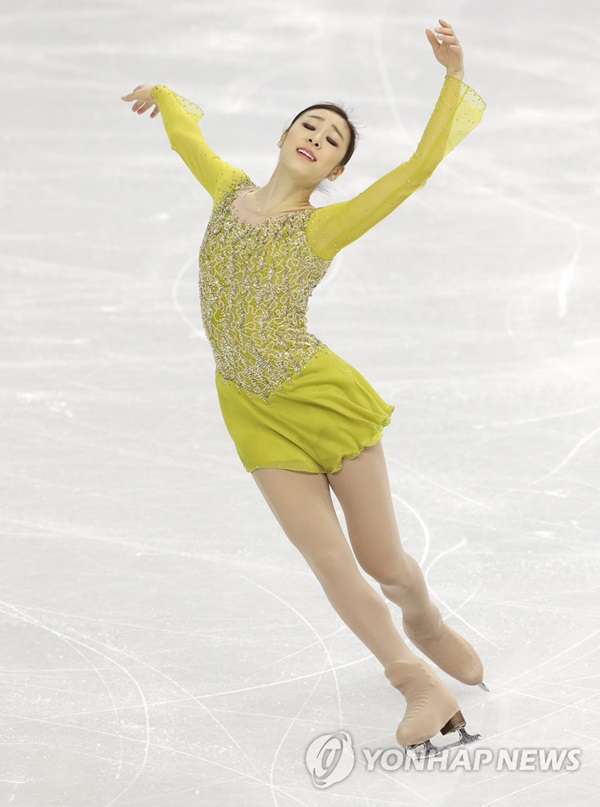

In [18]:
from IPython.display import Image, display
display(Image('yuna2.jpg'))

# 모델 로딩

In [19]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

In [13]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 24 kB/s 
     |████████████████████████████████| 1.3 MB 7.5 MB/s 
     |████████████████████████████████| 463 kB 47.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab202207

# 포즈 추출 실행

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7fc77c36e710>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7fc77c36e710>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


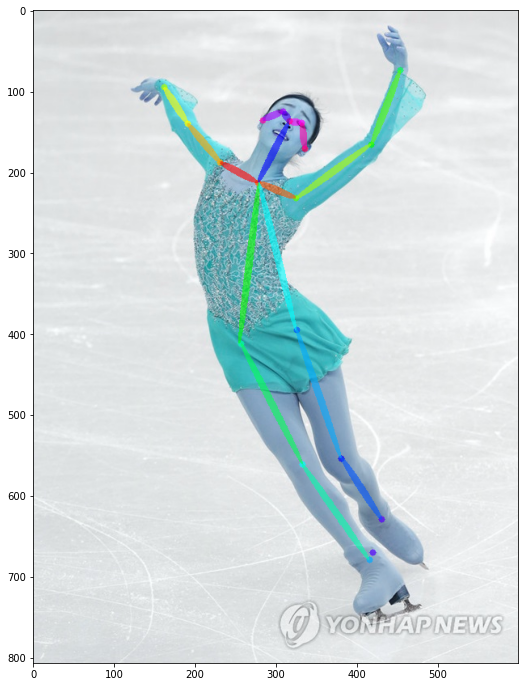

In [20]:
file_name = "yuna2.jpg"
all_peaks, subset, candidate = model.extract(file_name)
model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)

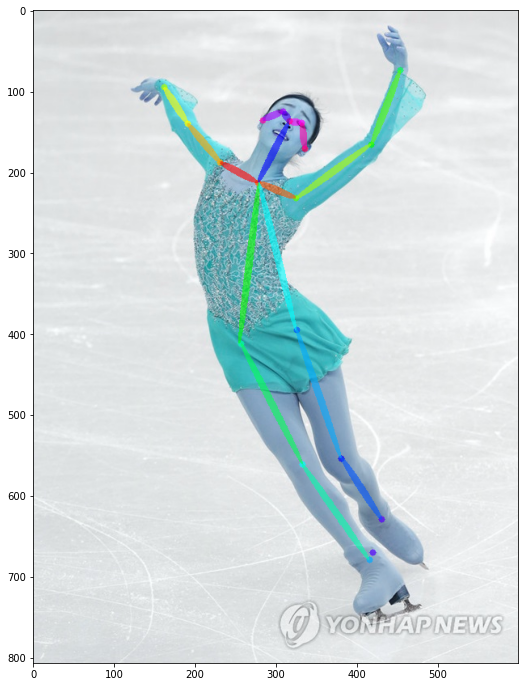

In [21]:
model.extract_and_draw(file_name)

#모델 저장 원본 코드

In [ ]:
#model = Sequential()
#model.add(Input(2))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(2, activation="softmax"))
#model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

#from tensorflow.keras.callbacks import ModelCheckpoint
#model_check_point = ModelCheckpoint(
#    'best_model.h5', 
#    monitor='val_loss', 
#    verbose=1, 
#    save_best_only=True)
#history = model.fit(train_x, train_y, epochs=300, batch_size=128, verbose=0, validation_split=0.2,
#                         callbacks=[model_check_point])

# 로스 실시간 출력

In [22]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

# CallBack

학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import Callback

import time

# 추출 결과 해석

all_peak와 subset에 그 결과가 담긴다.

- all_peaks : 추출된 모든 포인트의 정보
- subset : 사람 별로 추출된 포인트의 정보

18개 부위를 추출한다.

각 부위의 이름은 config.py에 정의되어 있다.

```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

## all_peaks

추출된 점이 담긴 all_peaks는 18개의 요소가 있는 리스트이다.

In [25]:
print(len(all_peaks))

18


In [26]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

[nose :  [(317, 137, 0.8845905363559723, 0)]
neck :  [(278, 213, 0.793506383895874, 1)]
Rsho :  [(231, 188, 0.7629716098308563, 2)]
Relb :  [(191, 140, 0.759689137339592, 3)]
Rwri :  [(162, 95, 0.8254435658454895, 4)]
Lsho :  [(325, 232, 0.6929091364145279, 5)]
Lelb :  [(418, 166, 0.7052574530243874, 6)]
Lwri :  [(454, 74, 0.7607120275497437, 7)]
Rhip :  [(257, 412, 0.5073265209794044, 8)]
Rkne :  [(333, 561, 0.6187013722956181, 9)]
Rank :  [(416, 679, 0.6240017637610435, 10)]
Lhip :  [(326, 395, 0.4954654276371002, 11)]
Lkne :  [(381, 554, 0.6351295486092567, 12)]
Lank :  [(431, 629, 0.5887984037399292, 13), (420, 670, 0.12321899994276464, 14)]
Leye :  [(309, 125, 0.8986079394817352, 15)]
Reye :  [(332, 139, 0.858579695224762, 16)]
Lear :  [(284, 136, 0.8426485359668732, 17)]
Rear :  [(336, 171, 0.9105583429336548, 18)]


all_peaks[0]은 추출된 nose의 포인트가 담겨 있다.

In [27]:
for i in range(len(all_peaks[0])):
  print(all_peaks[0][i])

(317, 137, 0.8845905363559723, 0)



1개의 point는 다음과 같이 구성된다.
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```

## subset

subset 각 요소는 사람 1명에 대한 추출 결과이다.

In [28]:
print(len(subset))

1


1개의 subset 요소는 1사람에 대한 19개 포인트 id로 구성되어 있다.

In [29]:
print(subset[0])

[ 0.          1.          2.          3.          4.          5.
  6.          7.          8.          9.         10.         11.
 12.         13.         15.         16.         17.         18.
 28.62476475 18.        ]



point_id는 all_peaks에 명시되어 있다.
```
all_peaks의 내용

(177, 6, 0.11634597013471648, 0)
(484, 130, 0.7376982569694519, 1)
(287, 154, 0.9168482273817062, 2)
(410, 221, 0.9359188675880432, 3)

각 줄의 마지막 숫가가 point_id이다.

```

각 포인트별 연결 가능 여부는 limSeq에 담겨 있다.

In [30]:
from open_pose_wrapper import limbSeq

print(len(limbSeq))
print(limbSeq)

19
[[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], [1, 16], [16, 18], [3, 17], [6, 18]]


[2, 3] 은 neck과 Rsho(righst shoulder)가 연결되어 있음을 의미하고, 

[3,4]는 Rsho(righst shoulder)와 Relb(right elbow)가 이어져 있다는 것을 의미한다.

```
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
...
```


In [85]:
# 데이터 나누기
split_index = int(len(all_peaks)*0.3)
train_x, test_x = list(all_peaks[:split_index][0][0]), list(all_peaks[split_index:][0][0])
train_y, test_y = list(all_peaks[:split_index][0][0]), list(all_peaks[split_index:][0][0])

print(train_x)
#print(train_x[0])
#print(train_x[0][0])
#print(train_x[0][0][1])

train_x = list(map(int, train_x))
train_y = list(map(int, train_y))

for i in range(len(train_x)):
  if train_x[i] == 0:
    train_x[i] = 1

for i in range(len(train_y)):
  if train_y[i] == 0:
    train_y[i] = 1

print(train_x)
print(train_y)

[317, 137, 0.8845905363559723, 0]
[317, 137, 1, 1]
[317, 137, 1, 1]


# 모델 저장 - ModelCheckpoint

In [86]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(18, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

#print(all_peaks[0][0][0])

#a = int(all_peaks[0][0][0])
#b = int(all_peaks[1][0][1])

from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=0, 
    save_best_only=True,
    #inputs=tf.Tensor(shape=(None,), dyte=int32),
    training=True,
    mask=None
    )
history = model.fit(train_x, train_y, epochs=10, batch_size=128, verbose=0,
                    callbacks=[model_check_point])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: ignored